## Figure 4: First-Year Enrollment CSDID Event Studies
for White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
qui {
    use data/hsi_white_enrollment_final3, clear
drop if lnftfefwhitt==. 
drop if year==1990 & hispserve==1
gen missingpanel=.
sort unitid year
bysort unitid: egen maxyear=max(year)
bysort unitid: egen minyear=min(year)
bysort unitid (year): replace missingpanel=1 if year[_n-1]!=year-1 | lnftfefwhitt==. | lnftfeftotlt==.
replace missingpanel=. if year==1990 & lnftfefwhitt!=. & lnftfeftotlt!=.
bysort unitid: egen missingpanelall=min(missingpanel)
replace missingpanelall=1 if maxyear!=2019 | minyear !=1990
bysort unitid: egen alwaystreated=min(hispserve)
bysort unitid: egen evertreated=max(hispserve)
drop if alwaystreated==1
drop if missingpanelall==1
gen treated=1
replace treated=0 if year<hispserveyear
}

In [2]:
egen gvar=csgvar(treated), tvar(year) ivar(unitid)

In [3]:
// Display log 18-24 population by race control variable names. //
// lnpop* is state level count. lncpop* is county level count
ds lnpop* lncpop*, varwidth(20)

lnpopulationam  lnpopulationbl  lnpopulationwh  lncpopas        lncpopwh
lnpopulationas  lnpopulationhi  lncpopam        lncpopbl        lncpophi


# white first year estimates

..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..............................
Difference-in-difference with Multiple Time Periods

                                                        Number of obs = 14,070
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+-------------------------------------------

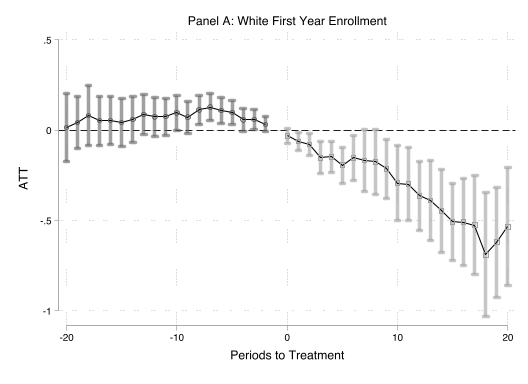

In [4]:
csdid lnftfefwhitt lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(simple) long2
qui csdid_estat event, window(-19 20)
csdid_plot, style(rcap) scheme(plotplain) ///
legend(off) title(Panel A: White First Year Enrollment) name(white, replace)

In [5]:
graph export figures/f4a_event_white_enrollment.pdf, replace

file figures/f4a_event_white_enrollment.pdf saved as PDF format


In [6]:
csdid lnftfeftotlt lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(simple) long2

..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..............................
Difference-in-difference with Multiple Time Periods

                                                        Number of obs = 14,070
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+-------------------------------------------

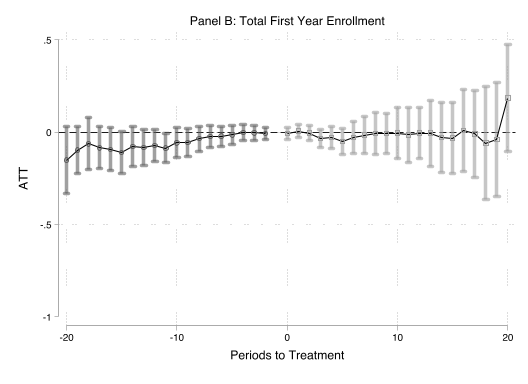

In [7]:
qui csdid_estat event, window(-19 20)
csdid_plot, style(rcap) scheme(plotplain) ylabel(-1(.5).5) ///
legend(off) title(Panel B: Total First Year Enrollment) name(total, replace)

In [8]:
graph export figures/f4b_event_total_enrollment.pdf, replace

file figures/f4b_event_total_enrollment.pdf saved as PDF format


In [9]:
csdid2 lnftfefwhitt lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(event) long2

Producing Long Gaps by default
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
..................................................    50
..................................................   100
..................................................   150
..................................................   200
..................................................   250
..................................................   300
..................................................   350
..................................................   400
..................................................   450
..................................................   500
..................................................   550
..............................
Difference-in-difference with Multiple Time Periods
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             |               Robust
             | Coefficient  std

In [10]:
tab year if year==gvar


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1991 |          2        3.57        3.57
       1992 |          1        1.79        5.36
       1993 |          2        3.57        8.93
       1996 |          1        1.79       10.71
       1999 |          1        1.79       12.50
       2000 |          6       10.71       23.21
       2003 |          1        1.79       25.00
       2004 |          1        1.79       26.79
       2006 |          2        3.57       30.36
       2009 |          1        1.79       32.14
       2010 |          3        5.36       37.50
       2011 |          1        1.79       39.29
       2012 |          1        1.79       41.07
       2013 |          6       10.71       51.79
       2014 |          9       16.07       67.86
       2015 |          5        8.93       76.79
       2016 |          2        3.57       80.36
       2017 |          7       12.50       92.86
       2018 |      